In [36]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timedelta
from tqdm import tqdm
sns.set()
tf.compat.v1.random.set_random_seed(1234)

In [38]:
tf.__version__

'2.5.0'

In [39]:
# from google.colab import drive
# drive.mount('/content/drive') # 원하는 세부 경로로 변경이 가능합니다.

In [40]:
# pip install -U finance-datareader

In [41]:
import FinanceDataReader as fdr


In [79]:
df = fdr.DataReader("069500",start= '2012-01-01')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2012-01-02,20242,20346,20092,20265,2047695,0.002027
2012-01-03,20445,20902,20323,20902,6309724,0.031434
2012-01-04,21017,21025,20769,20783,10832944,-0.005693
2012-01-05,20798,20879,20685,20747,5014582,-0.001732
2012-01-06,20725,20742,20179,20455,4309016,-0.014074
...,...,...,...,...,...,...
2022-05-20,34515,35025,34485,34985,4661990,0.017894
2022-05-23,35135,35225,34915,35100,5876025,0.003287
2022-05-24,34950,35030,34450,34450,5416640,-0.018519


In [80]:
target = []
for i in range(df.shape[0]):
    if df['Change'][i] >0:
        target.append(1)
    else:
        target.append(0)
df['Target'] = target


In [81]:
df.head(10)

,Open,High,Low,Close,Volume,Change,Target
Date,,,,,,,
2012-01-02,20242,20346,20092,20265,2047695,0.002027,1
2012-01-03,20445,20902,20323,20902,6309724,0.031434,1
2012-01-04,21017,21025,20769,20783,10832944,-0.005693,0
2012-01-05,20798,20879,20685,20747,5014582,-0.001732,0
2012-01-06,20725,20742,20179,20455,4309016,-0.014074,0
2012-01-09,20333,20333,20025,20194,7237398,-0.012760,0
2012-01-10,20314,20632,20304,20538,6836552,0.017035,1
2012-01-11,20617,20632,20408,20489,3679568,-0.002386,0
2012-01-12,20495,20655,20359,20642,2097337,0.007467,1


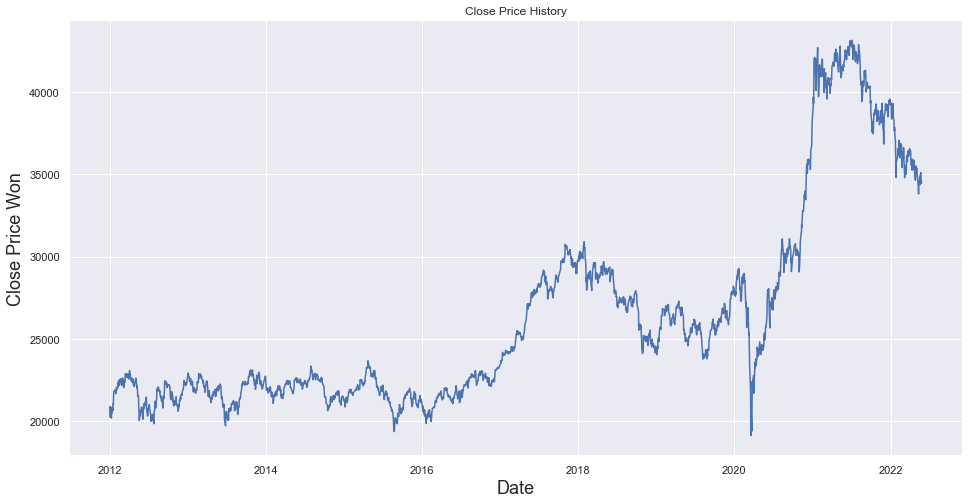

In [82]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Won', fontsize=18)
plt.show()

In [83]:
minmax = MinMaxScaler().fit(df.iloc[:, 0:7].astype('float32')) # Close index
scaled_data = minmax.transform(df.iloc[:, 0:7].astype('float32')) # Close index
scaled_data = pd.DataFrame(scaled_data)
scaled_data.head()

,0,1,2,3,4,5,6
0,0.046540,0.029836,0.051244,0.047024,0.010043,0.453722,1.0
1,0.054983,0.052876,0.060790,0.073556,0.080154,0.630805,1.0
2,0.078772,0.057973,0.079221,0.068599,0.154562,0.407229,0.0
3,0.069664,0.051923,0.075750,0.067100,0.058849,0.431083,0.0
4,0.066628,0.046246,0.054839,0.054938,0.047242,0.356759,0.0


In [84]:
type(scaled_data)

pandas.core.frame.DataFrame

In [85]:
#create the training data set
#create the scaled training data set
train_data = scaled_data.iloc[0:-100,:]
#Split the data
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data.iloc[i-60:i,0:6])
    y_train.append(train_data.iloc[i,6])

In [86]:
#Convert the train data to numpy arrrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [87]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],6))
x_train.shape

(2401, 60, 6)

In [88]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [89]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],6)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [90]:
#Train the model
tf.debugging.set_log_device_placement(True)
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
2401/2401 [==============================] - 57s 22ms/step - loss: 8.3486 - accuracy: 0.4588
Epoch 2/10
2401/2401 [==============================] - 50s 21ms/step - loss: 8.3187 - accuracy: 0.4607
Epoch 3/10
2401/2401 [==============================] - 54s 22ms/step - loss: 8.1650 - accuracy: 0.4707
Epoch 4/10
2401/2401 [==============================] - 63s 26ms/step - loss: 8.1804 - accuracy: 0.4697
Epoch 5/10
2401/2401 [==============================] - 54s 22ms/step - loss: 8.0113 - accuracy: 0.4806
Epoch 6/10
2401/2401 [==============================] - 54s 22ms/step - loss: 8.2186 - accuracy: 0.4672
Epoch 7/10
2401/2401 [==============================] - 55s 23ms/step - loss: 8.0323 - accuracy: 0.4793
Epoch 8/10
2401/2401 [==============================] - 56s 23ms/step - loss: 8.1270 - accuracy: 0.4731
Epoch 9/10
2401/2401 [==============================] - 55s 23ms/step - loss: 8.2079 - accuracy: 0.4679
Epoch 10/10
2401/2401 [==============================] - 55s 23m

In [91]:
#Create the testing data set
#Create a new array containg scaled values for test data set
test_data = scaled_data.iloc[-160:,:]
x_test=[]
y_test=scaled_data.iloc[-100:,6]
for i in range(60, len(test_data)):
    x_test.append(test_data.iloc[i-60:i,0:6])

In [92]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [93]:
#REshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],6))


In [94]:
predictions = model.predict(x_test)

In [95]:
result = model.evaluate(x_test, y_test, batch_size=1)

100/100 [==============================] - 7s 6ms/step - loss: 6.7870 - accuracy: 0.5600


In [97]:
model.save_weights('final_data/taeyongmodelweight1')

In [98]:
model.save('final_data/taeyongmodel1',include_optimizer=False)

INFO:tensorflow:Assets written to: taeyongmodel\assets


INFO:tensorflow:Assets written to: taeyongmodel\assets
